In [5]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Audio

In [6]:
annotations_path = "../data/annotations/annotations.csv"
annonations = pd.read_csv(annotations_path)
annonations

,label,path
0,glass_break,../data/proccessed/processed_dataset/glass_bre...
1,glass_break,../data/proccessed/processed_dataset/glass_bre...
2,glass_break,../data/proccessed/processed_dataset/glass_bre...
3,glass_break,../data/proccessed/processed_dataset/glass_bre...
4,glass_break,../data/proccessed/processed_dataset/glass_bre...
...,...,...
7623,neutral,../data/proccessed/processed_dataset/neutral\Y...
7624,neutral,../data/proccessed/processed_dataset/neutral\Y...
7625,neutral,../data/proccessed/processed_dataset/neutral\Y...
7626,neutral,../data/proccessed/processed_dataset/neutral\Y...


#### Class Item Counts

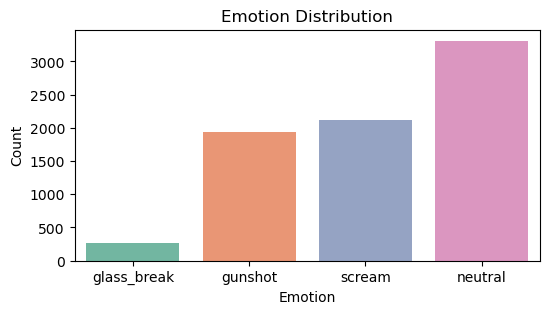

In [8]:
# Plot the distribution of classes
plt.figure(figsize=(6, 3))
sns.countplot(x='label', data=annonations, hue='label', palette='Set2', legend=False)
plt.title('Emotion Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

#### Wave Plots for each Class

In [9]:
'''
Waveplot - Waveplot let us know the loudness of the audio at a given time

Spectogram - A spectrogram is a visual representation of the spectrum of frequencies 
             of sound or other signals as they vary with time. It's a representation of 
             frequencies changing with respect to time for given audio/music signals.

'''

def create_waveplot(data, sr, e):
    plt.figure(figsize=(6, 2))
    plt.title('Waveplot for audio with {} label'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(6, 2))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()
    
def display_wave_plots(label):
    # Find the path for the given emotion
    path = np.array(annonations.path[annonations.label == label])[0]  # Use the first match
    data, sampling_rate = librosa.load(path)

    # Create wave plot and spectrogram
    create_waveplot(data, sampling_rate, label)
    create_spectrogram(data, sampling_rate, label)
    
    display(Audio(path))

##### Wave Plots for Neutral

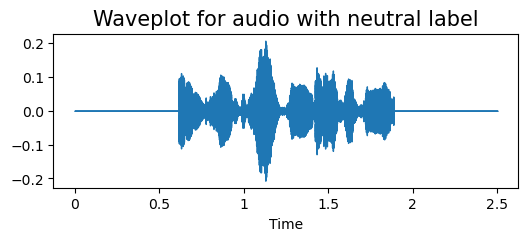

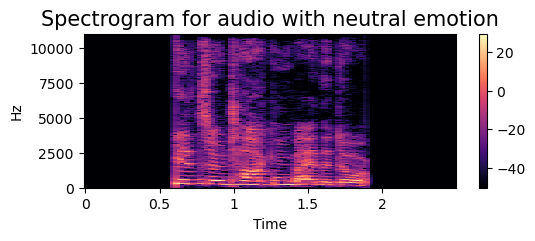

In [18]:
display_wave_plots('neutral')

##### Wave Plots for Scream

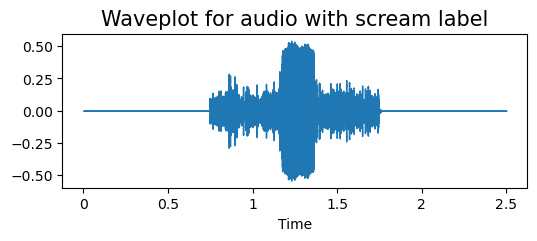

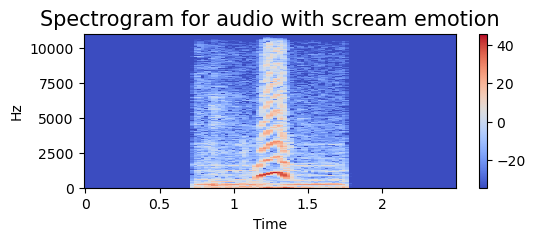

In [17]:
display_wave_plots('scream')

##### Wave Plots for Gunshot

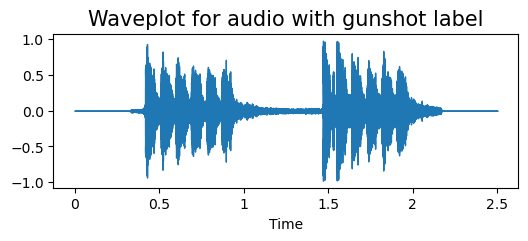

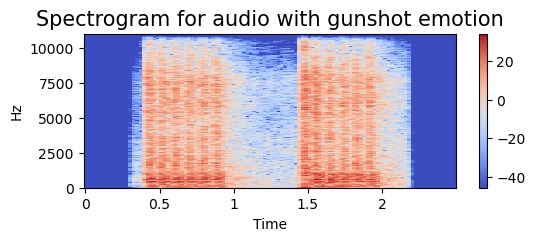

In [14]:
display_wave_plots('gunshot')

##### Wave Plots for Glass Break

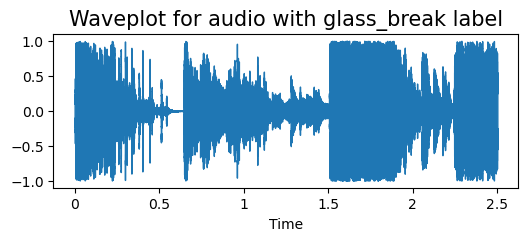

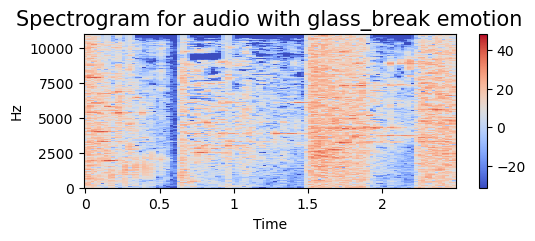

In [15]:
display_wave_plots('glass_break')